## 👩‍💻 상자 그림과 산포도
### ✔️ 상자 그림(box-and-whisker plot)
먼저, 분석을 위한 자료를 준비한 다음 ```attach```한다.

In [1]:
setwd("C:/Users/eunee/khu_sda_2019/data")
load("demog_5var.RData")

ndemog$year_c <- floor(ndemog$year/10)-197
ndemog$tfr_c <- cut(ndemog$tfr, breaks = c(-Inf, 1.3, 2.1, Inf), labels = c("llf", "repl", "high"))
ndemog$cdr_c <- cut(ndemog$cdr, breaks = c(-Inf, 6, 7, Inf), labels = c("LT6", "6-LT7", "EToMT7"))

attach(ndemog)

```boxplot``` 명령어를 통해 상자 그림을 그릴 수 있다.

#### ◽  ```boxlpot```을 활용한 합계출산율 그림

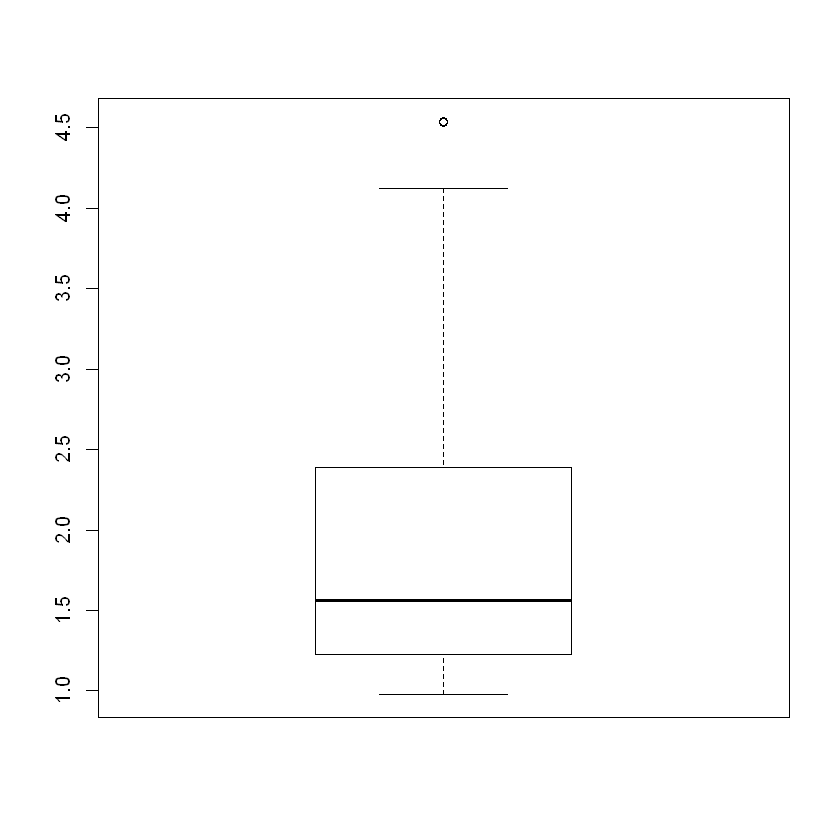

In [2]:
boxplot(tfr)

상자의 아래 끝은 ```첫 번째 사분위수```, 굵은 줄은 ```중간값```, 위 끝은 ```세 번째 사분위수```를 의미한다.     
```최댓값```이 ```1.5*사분위 범위``` 보다 작으면 이때 최댓값을 위쪽 선으로, ```최솟값```이 ```1.5*사분위 범위```보다 크면 이때 최댓값을 아래쪽 선으로 그린다.    
포함되지 않는 사례(outlier)가 있다면 점으로 표시한다. 이 그림에서 분포는 오른쪽으로 skewed되어 있다.

#### ◽ ```boxplt```을 활용한 조사망률 범주에 따른 합계출산율 상자 그림

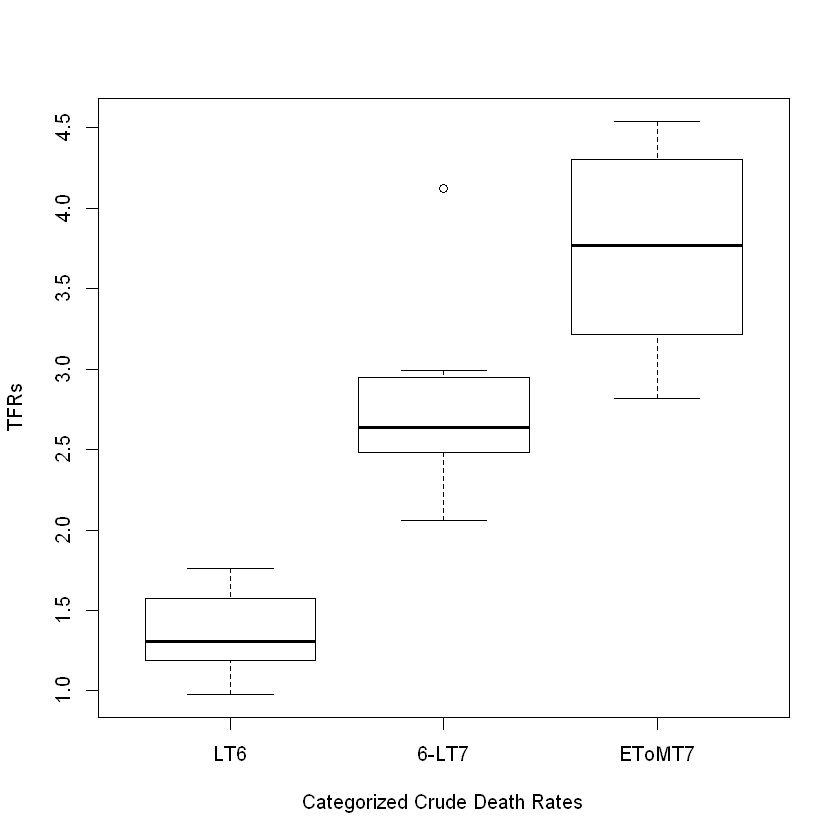

In [3]:
boxplot(tfr ~ cdr_c, ylab = "TFRs", xlab = "Categorized Crude Death Rates")

이때, ```~```을 활용하여 ```formula```처럼 ```boxplot``` 함수를 적용함에 유의한다.    
조사망률 범주가 높아질수록 합계출산율이 높아진다는 경향을 파악할 수 있다.

### ✔️ 산포도(scatter plot)
바로 위에서 그린 그림에서는 조사망률과 합계출산율이라는 **양적 변수**를 **범주화**하여 두 변수의 관계를 살펴보았다. 그러나 양적 변수를 질적 변수로 바꾸는 과정에서 <u>정보의 손실</u>이 발생하기 때문에, 좋은 방법은 아니다.

#### ◽ ```plot```를 활용한 조사망률과 합계출산율 산포도 그리기

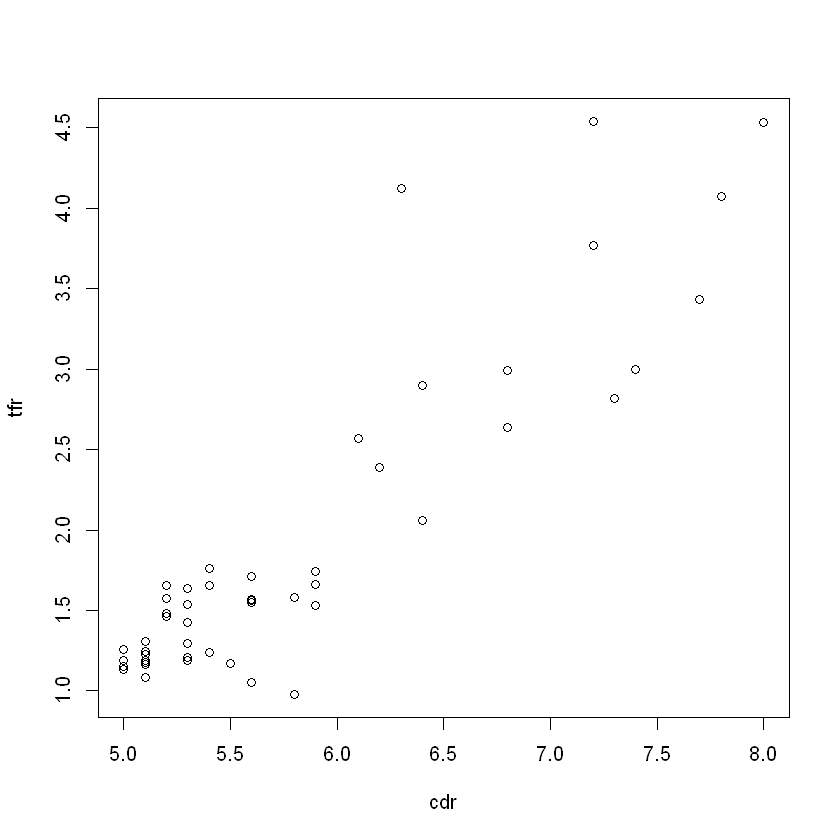

In [4]:
plot(cdr, tfr)

이때, ```boxplot```의 사례와는 달리 ```~```가 아니라 ```쉼표```로 **설명변수, 종속변수** 순으로 작성한다. 이때 각 연도별 사례는 점으로 표시된다.   
그림을 보면 상당히 두 변수 사이에 선형적인 관계가 있음을 확인할 수 있다.     
여기에 **회귀선**과 **LOESS**을 얹어서 더 예쁜 산포도를 그리고 싶다.

#### ◽ ```lm``` 활용하여 선형 모형 만들기

In [5]:
fit1 <- lm(tfr ~ cdr)
summary(fit1)


Call:
lm(formula = tfr ~ cdr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92997 -0.25042  0.03918  0.18335  1.69110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.14742    0.43599  -9.513 1.57e-12 ***
cdr          1.04386    0.07423  14.063  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4336 on 47 degrees of freedom
Multiple R-squared:  0.808,	Adjusted R-squared:  0.8039 
F-statistic: 197.8 on 1 and 47 DF,  p-value: < 2.2e-16


```lm``` 명령어는 ```formula``` 형태로 작성함에 유의하자. ```summary```를 통해 선형 회귀 결과를 볼 수 있다.      
##### ▪️ Coefficents
y 절편 : -4.14742    
설명 변수의 기울기 : 1.04386 (```cdr```이 한 단위 증가할 때 ```tfr```이 1.04386 단위만큼 증가한다.)   
$$\hat { y } =\quad a+bx\\ \hat { y } =\quad -4.14742+1.04386x$$

#### ▪️ Residual standard error
$$TFR{ =\beta  }_{ 0 }+{ \beta  }_{ 1 }CDR+\epsilon$$

잔차의 표준편차에 대한 추정값을 의미. 이때 자유도는 47인데, 두 개의 계수를 구하는 과정에서 2개의 자유도를 사용하였기 때문이다.     
#### ▪️ R-squared
모형의 적합도를 평가하기 위해 사용하며, 여기서는 0.808이다. 평균을 사용하여 예측할 때 나오는 전체제곱 합 중 얼마나 많은 부분을 설명변수가 설명하는지(여기서는 80.8%)를 나타낸다.
#### ▪️ F-statistics
모든 **설명 변수의 계수가 0이라는 영가설**을 검정하는 통계값이다. ANOVA라고도 불리지만 설명변수가 양적 변수인 경우에도 사용 가능하다는 점에서 ANOVA보다 일반화된 검정이다.    
통계값은 197.8이면서 p값은 ```Coefficients``` 탭에서 설명하는 t-test의 p값과 동일하다.

### ✔️ LOESS와 회귀선이 들어간 산포도

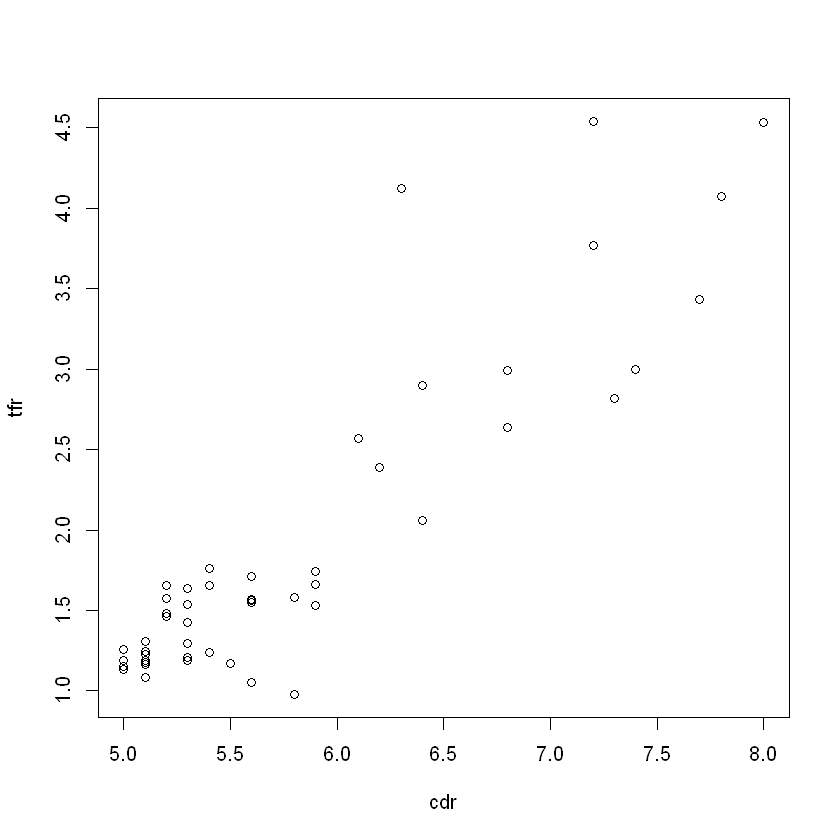

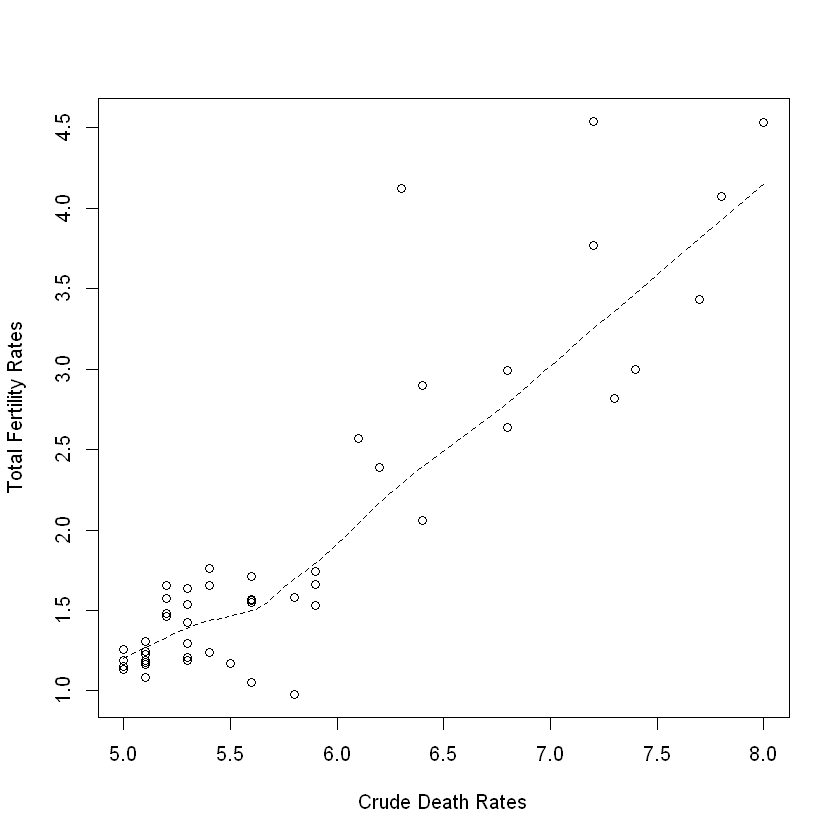

In [14]:
plot(cdr, tfr)
scatter.smooth(cdr, tfr, lpars = list(lty=2), , xlab = "Crude Death Rates", ylab = "Total Fertility Rates")

x축과 y축의 이름을 ```scatter.smooth``` 명령어에 덧붙였다.

In [10]:
args(scatter.smooth)

function (x, y = NULL, span = 2/3, degree = 1, family = c("symmetric", 
    "gaussian"), xlab = NULL, ylab = NULL, ylim = range(y, pred$y, 
    na.rm = TRUE), evaluation = 50, ..., lpars = list()) 
NULL

```scatter.smooth``` 명령어에는 위와 같이 각 축의 이름을 넣도록 하는 명령어가 포함되어 있기 때문에, 먼저 나온 ```plot``` 명령어의 옵션은 반영되지 않고 뒤에 나온 ```scatter.smooth``` 명령어의 옵션이 반영된다.

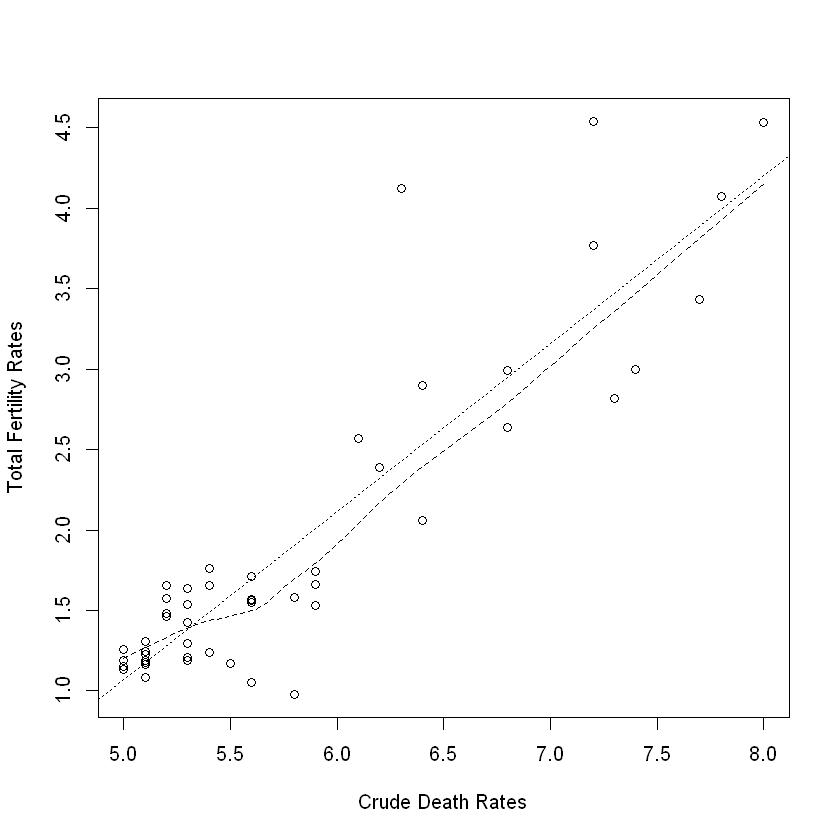

In [15]:
scatter.smooth(cdr, tfr, lpars = list(lty=2), , xlab = "Crude Death Rates", ylab = "Total Fertility Rates")
abline(fit1, lty = 3)

```abline``` 명령어를 활용해 ```fit1```으로 추정한 회귀선을 그려준다.    
이 명령어는 ```fit1``` 객체에 저장된 회귀결과를 ```lty=3``` 옵션으로 설정해 그려준다.     
마지막으로 ```legend``` 명령어를 활용해 범례를 그려보자.

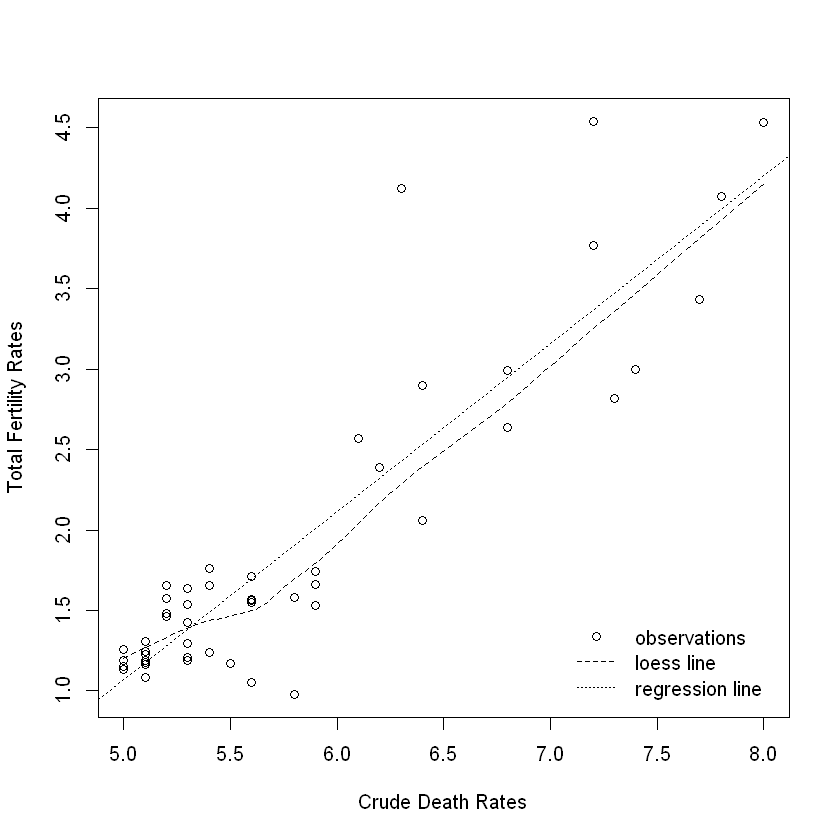

In [22]:
scatter.smooth(cdr, tfr, lpars = list(lty=2), , xlab = "Crude Death Rates", ylab = "Total Fertility Rates")
abline(fit1, lty = 3)
legend(7.1, 1.5, pch = c(1, NA, NA), lty = c(NA, 2:3), c("observations", "loess line", "regression line"), bty = "n")

#### ▪️  loess line
회귀선이 전체 자료의 회귀분석이라면, 이는 **local regression**으로 x축의 잘게 자른 구간에서의 회귀분석이다. ```scatter.smooth``` 은 결과를 부드러운 곡선으로 연결해 준다. 이는 회귀선이 얼마나 모형에 적합한지를 판단할 수 있는 근거가 된다.


#### ▪️  regression line
회귀분석은 전체 자료에 대한 회귀분석이기 때문에 추정의 무리가 발생할 수 있다. 특히 이 회귀선은 설명변수가 종속변수에 주는 영향이 모든 설명변수의 구간에서 동일하다는 것을 가정한다. 이 한계를 극복하기 위해 **loess line**을 함께 그린다.

#### ▪️  범례
```bty = "n"``` : 범례를 둘러싸고 있는 box를 제거한다.   
```pch = c(1, NA, NA)``` : 1은 동그라미로 표시된 observations를 의미한다. loess와 regression line은 점이 아니라 선으로 표시되므로 NA   
```lty = c(NA, 2, 3)``` : 2는 dashed, 3은 점선으로 나타낸다. 위와 마찬가지로 observations는 선이 아니므로 NA


### ✔️ 다중회귀분석
**최소제곱법**은 다른 변수를 통제한 상태에서 두 변수의 관계를 살펴보는 회귀분석의 한 기법이다. 

In [26]:
fit2 <- lm(tfr ~ cdr + year + marn)
summary(fit2)


Call:
lm(formula = tfr ~ cdr + year + marn)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55933 -0.23966  0.03423  0.19727  0.55769 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.406e+01  1.297e+01   7.249 4.35e-09 ***
cdr          3.124e-01  1.078e-01   2.897   0.0058 ** 
year        -4.616e-02  6.126e-03  -7.536 1.65e-09 ***
marn        -5.572e-06  1.005e-06  -5.543 1.48e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.292 on 45 degrees of freedom
Multiple R-squared:  0.9166,	Adjusted R-squared:  0.9111 
F-statistic: 164.9 on 3 and 45 DF,  p-value: < 2.2e-16


인과적 추론을 위해서는 설명 변수와 종속 변수 모두에 영향을 주는  **혼동 변수**를 통제할 필요가 있다. 이를 위해 다중회귀분석을 수행한다.   

위 명령어는 종속변수 ```tfr```에 대한 설명변수로 ```cdr```뿐만 아니라 ```year```와 ```marn```도 포함할 때의 회귀분석 결과를 보여준다. 이들은 연속변수이므로 그대로 넣어 준다.    

만약 범주형 변수를 넣기 위해서는 ```factor``` 명령어를 통해 넣어줄 수 있다. 이 경우 R이 자동으로 더미 변수를 넣어 처리한다.   
    
```year```와 ```marn```을 통제한 상태에서 ```cdr```이 ```tfr```에 주는 영향을 알아보는 것이 우리의 최종 목표이다. 통제하지 않은 모형 ```fit1```와 통제한 모형 ```fit2```에서 ```cdr```의 계수를 확인해 보자.

In [28]:
print("회귀분석 fit1")
summary(fit1)

print("다중회귀분석 fit2")
summary(fit2)

[1] "회귀분석 fit1"



Call:
lm(formula = tfr ~ cdr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92997 -0.25042  0.03918  0.18335  1.69110 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.14742    0.43599  -9.513 1.57e-12 ***
cdr          1.04386    0.07423  14.063  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4336 on 47 degrees of freedom
Multiple R-squared:  0.808,	Adjusted R-squared:  0.8039 
F-statistic: 197.8 on 1 and 47 DF,  p-value: < 2.2e-16


[1] "다중회귀분석 fit2"



Call:
lm(formula = tfr ~ cdr + year + marn)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55933 -0.23966  0.03423  0.19727  0.55769 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.406e+01  1.297e+01   7.249 4.35e-09 ***
cdr          3.124e-01  1.078e-01   2.897   0.0058 ** 
year        -4.616e-02  6.126e-03  -7.536 1.65e-09 ***
marn        -5.572e-06  1.005e-06  -5.543 1.48e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.292 on 45 degrees of freedom
Multiple R-squared:  0.9166,	Adjusted R-squared:  0.9111 
F-statistic: 164.9 on 3 and 45 DF,  p-value: < 2.2e-16


##### ▪️ Coefficients
```fit1```에서 ```cdr```의 계수는 1.04386이지만, 혼동변수를 통제한 ```fit2```에서 ```cdr```의 계수는 3.124e-01로 작아졌다. 즉, 이 분석에서 ```year```와 ```marn```을 통제했을 때 조사망률이 한 단위 증가할 때 합계출산율이 0.31 단위 증가한다. 

##### ▪️  R-squared
0.808에서 0.9166으로 설명력이 증가했다. (R-squared는 설명변수가 추가되면 증가하거나 최소한 그대로 유지된다.)

##### ▪️  F-statistics
설명 변수의 계수가 모두 0이라는 영가설을 검정하는데, 이때 p값이 매우 작다. 따라서 세 설명 변수 중 적어도 하나의 계수는 0이 아니다.

#### ◽ ```anova```를 활용한 두 모형의 비교
두 모형의 추정 결과를 쉽게 비교하기 위해 ```anova``` 명령어를 사용한다.

In [31]:
anova(fit1, fit2)

Res.Df RSS      Df Sum of Sq F        Pr(>F)      
1 47     8.835105 NA      NA         NA           NA
2 45     3.835845  2 4.99926   29.32427 7.032511e-09

F 검정 결과 p값이 거의 0이다. 따라서 이 검정은 통계적으로 유의미하며 영가설을 기각한다.

### ✔️ 회귀분석(축소 모형) vs 다중회귀분석(완전 모형)
#### ◽ 축소 모형
$$ TFR={ \acute { \beta  }  }_{ 0 }+{ \acute { \beta  }  }_{ 1 }CDR+\acute { \epsilon  } $$
#### ◽ 완전 모형
$$ TFR={ \beta  }_{ 0 }+{ \beta  }_{ 1 }CDR+{ \beta  }_{ 2 }YEAR+{ \beta  }_{ 3 }MARN+\epsilon  $$

위 ```anova``` 를 활용한 두 모형의 비교에서의 영가설 : 두 모형이 동일한 설명력을 가진다. 또는  
$$ { \beta  }_{ 2 }={ \beta  }_{ 3 }=0 $$ 이다.